# Visualização de Dados

## 1 - Importação das bibliotecas

In [5]:
import numpy as np
from numpy import random
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import json
import urllib
import requests

## 2 - Importação dos dados

In [6]:
uri = 'https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-17-mun.json'
response = requests.get(uri)
geojson_tocantins_data = response.json()
database = pd.read_csv('data/hansnet_v0.csv', low_memory=False)

## 3 - Preparação dos Dados

### 3.1 - Criação do mapa

In [7]:
tocantins_map = gpd.read_file(uri)
count_by_municipio = database['ID_MUNICIP'].value_counts(dropna=False)
states = pd.DataFrame({
    "count": list(count_by_municipio.values),
    "code": count_by_municipio.keys().to_list(),
})
tocantins_map['id'] = tocantins_map['id'].apply(lambda x : int(str(x)[0:-1]))
tocantins_map = tocantins_map.join(states.set_index('code'), on='id')

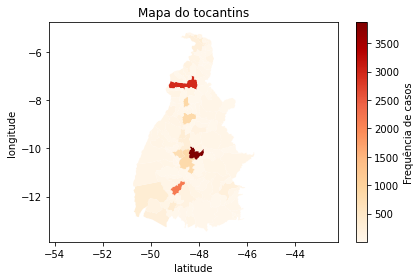

In [11]:
ax = plt.subplot(1,1,1)
tocantins_map.plot(column='count',
    cmap=plt.cm.OrRd,
    figsize=(10,20),
    legend=True,
    legend_kwds={
        "label":"Frequência de casos", 
    },
    ax=ax
)
ax.set(title='Mapa do tocantins', xlabel='latitude', ylabel='longitude')
ax.set_aspect('equal', adjustable='datalim')
plt.tight_layout()
plt.savefig('filename.png', dpi=300)
plt.show()

### 3.2 Criação do mapa das regiões de saúde